# Stock Market Analysis 


# 1. The change in price of the stock overtime


In [1]:
# importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
import yfinance as yf

# For time stamps
from datetime import datetime

yf.pdr_override()


from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional
from keras.optimizers import SGD

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import math

import warnings
warnings.filterwarnings("ignore")

df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show the data
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.500191,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.567371,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.706894,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.839728,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.819365,394024400


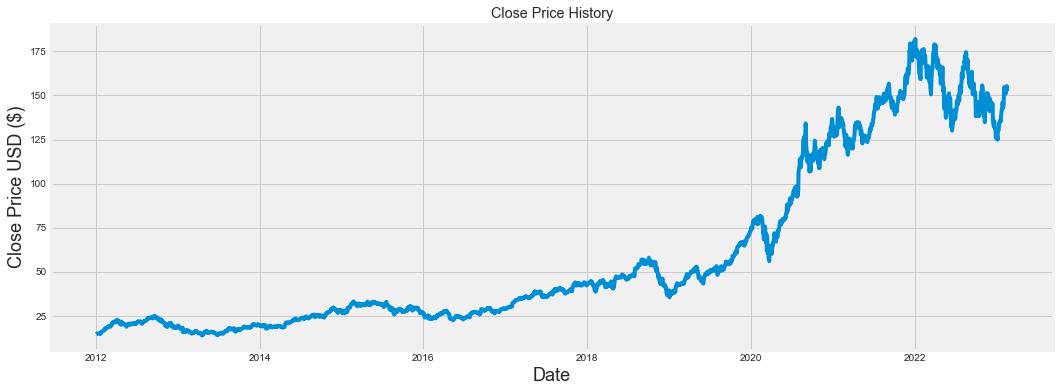

In [2]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [3]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2661

In [4]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.84124957],
       [0.83161033],
       [0.82470811]])

In [5]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, SimpleRNN, GRU

# initializing the RNN
model = Sequential()

# adding first RNN layer and dropout regulatization
model.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

# adding second RNN layer and dropout regulatization
model.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True))
model.add(Dropout(0.2))

# adding third RNN layer and dropout regulatization
model.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True))
model.add(Dropout(0.2))
# adding fourth RNN layer and dropout regulatization
model.add(SimpleRNN(units = 50))
model.add(Dropout(0.2))

# adding the output layer
model.add(Dense(units = 1))


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 60, 50)            2600      
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 60, 50)            5050      
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 60, 50)            5050      
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 50)               

In [10]:
# compiling RNN
model.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
model.fit(x_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
82/82 [==============================] - 4s 24ms/step - loss: 0.3742 - accuracy: 7.6894e-04
Epoch 2/50
82/82 [==============================] - 2s 25ms/step - loss: 0.1800 - accuracy: 7.6894e-04
Epoch 3/50
82/82 [==============================] - 2s 24ms/step - loss: 0.1134 - accuracy: 3.8447e-04
Epoch 4/50
82/82 [==============================] - 2s 24ms/step - loss: 0.0795 - accuracy: 7.6894e-04
Epoch 5/50
82/82 [==============================] - 2s 23ms/step - loss: 0.0565 - accuracy: 7.6894e-04
Epoch 6/50
82/82 [==============================] - 2s 23ms/step - loss: 0.0368 - accuracy: 7.6894e-04
Epoch 7/50
82/82 [==============================] - 2s 23ms/step - loss: 0.0279 - accuracy: 7.6894e-04
Epoch 8/50
82/82 [==============================] - 2s 23ms/step - loss: 0.0232 - accuracy: 7.6894e-04
Epoch 9/50
82/82 [==============================] - 2s 23ms/step - loss: 0.0177 - accuracy: 7.6894e-04
Epoch 10/50
82/82 [==============================] - 2s 24ms/step - loss:

In [11]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 0s 10ms/step


6.814512928661608

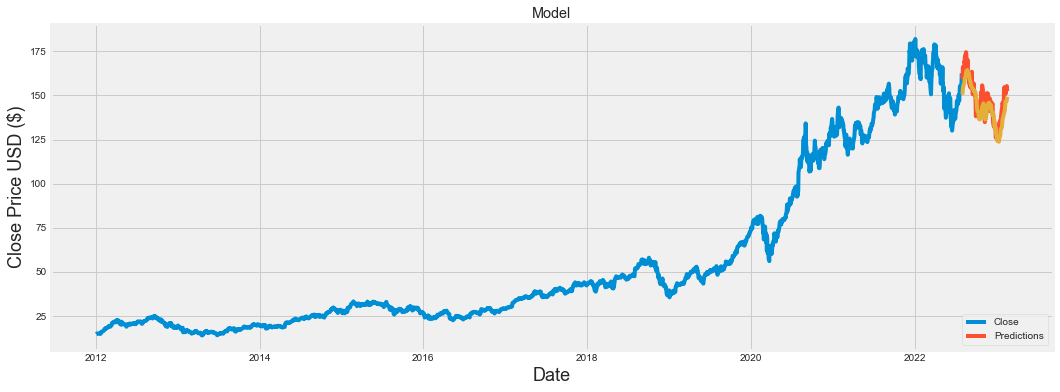

In [12]:
# Plot the data
train = data[:training_data_len]
test = data[training_data_len:]
test['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(test[['Close', 'Predictions']])
plt.legend(['Close', 'Predictions'], loc='lower right')
plt.show()

In [13]:
# Show the valid and predicted prices
test

,Close,Predictions
Date,,
2022-08-01,161.509995,150.478531
2022-08-02,160.009995,152.045563
2022-08-03,166.130005,153.320267
2022-08-04,165.809998,154.613998
2022-08-05,165.350006,155.532562
...,...,...
2023-02-13,153.850006,146.636642
2023-02-14,153.199997,146.711365
2023-02-15,155.330002,147.399414
